<a href="https://colab.research.google.com/github/IfrazQazi/Appliances-Energy-Prediction-Capstone_Project/blob/main/Appliances_Energy_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data-driven prediction of energy use of appliances
##The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru) and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non-predictive attributes (parameters).
date time year-month-day hour:minute:second
 
Appliances, energy use in Wh (Dependent variable) 

lights, energy use of light fixtures in the house in Wh


T1, Temperature in kitchen area, in Celsius

RH1, Humidity in kitchen area, in % 

T2, Temperature in living room area, in Celsius

RH2,Humidity in living room area, in %

T3, Temperature in laundry room area

RH3, Humidity in laundry room area, in % 

T4, Temperature in office room, in Celsius 

RH4,Humidity in office room, in %

T5, Temperature in bathroom, in Celsius

RH5, Humidity in bathroom, in % 

T6, Temperature outside the building (north side), in Celsius

RH6, Humidity outside the building (north side), in %

T7, Temperature in ironing room , in Celsius

RH7, Humidity in ironing room, in % 

T8, Temperature in teenager room 2, in Celsius 

RH8,Humidity in teenager room 2, in %

T9, Temperature in parents room, in Celsius

RH9, Humidity in parents room, in % 

To, Temperature outside (from Chievres weather station), in Celsius 

Pressure (from Chievres weather station), in mm Hg 

RHout, Humidity outside (fromChievres weather station), in %

Wind speed (from Chievres weather station), in m/s

Visibility (from Chievres weather station), in km

Tdewpoint (from Chievres weather station), Â°C

rv1, Random variable 1, nondimensional

rv2, Random variable 2, nondimensional

## First importing libraries and mounting google drive.
## loading data into data frame

In [223]:
#importing library
import pandas as pd 
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import scipy.stats as stat
import pylab
import missingno as mno

%matplotlib inline 

In [224]:
import warnings
warnings.filterwarnings("ignore")

In [225]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [226]:
# loading Appliances Energy Prediction data into data frame
path='/content/drive/MyDrive/AlmaBetter/ML capstone project regression/data_application_energy.csv'
energyP_df=pd.read_csv(path)

In [227]:
# head of dataframe
energyP_df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [228]:
energyP_df.tail()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,45.590000,23.20,52.400000,24.796667,1.0,24.500000,44.500000,24.7000,50.07400,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,45.590000,23.23,52.326667,24.196667,1.0,24.557143,44.414286,24.7000,49.79000,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,45.730000,23.23,52.266667,23.626667,1.0,24.540000,44.400000,24.7000,49.66000,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,45.790000,23.20,52.200000,22.433333,1.0,24.500000,44.295714,24.6625,49.51875,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,45.963333,23.20,52.200000,21.026667,1.0,24.500000,44.054000,24.7360,49.73600,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


In [229]:
# shape of dataframe
energyP_df.shape


(19735, 29)

##Above dataframe is having 19735 rows and 29 columns.
## No categorical features.
##And target variable is Appliances column.

In [230]:
energyP_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

## We can see that almost all columns are numeric data type.
## only one column is object data type

## lets check if there is null values in our dataset

In [231]:
# checking if there is any null value in dataset
energyP_df.isnull().any()

date           False
Appliances     False
lights         False
T1             False
RH_1           False
T2             False
RH_2           False
T3             False
RH_3           False
T4             False
RH_4           False
T5             False
RH_5           False
T6             False
RH_6           False
T7             False
RH_7           False
T8             False
RH_8           False
T9             False
RH_9           False
T_out          False
Press_mm_hg    False
RH_out         False
Windspeed      False
Visibility     False
Tdewpoint      False
rv1            False
rv2            False
dtype: bool

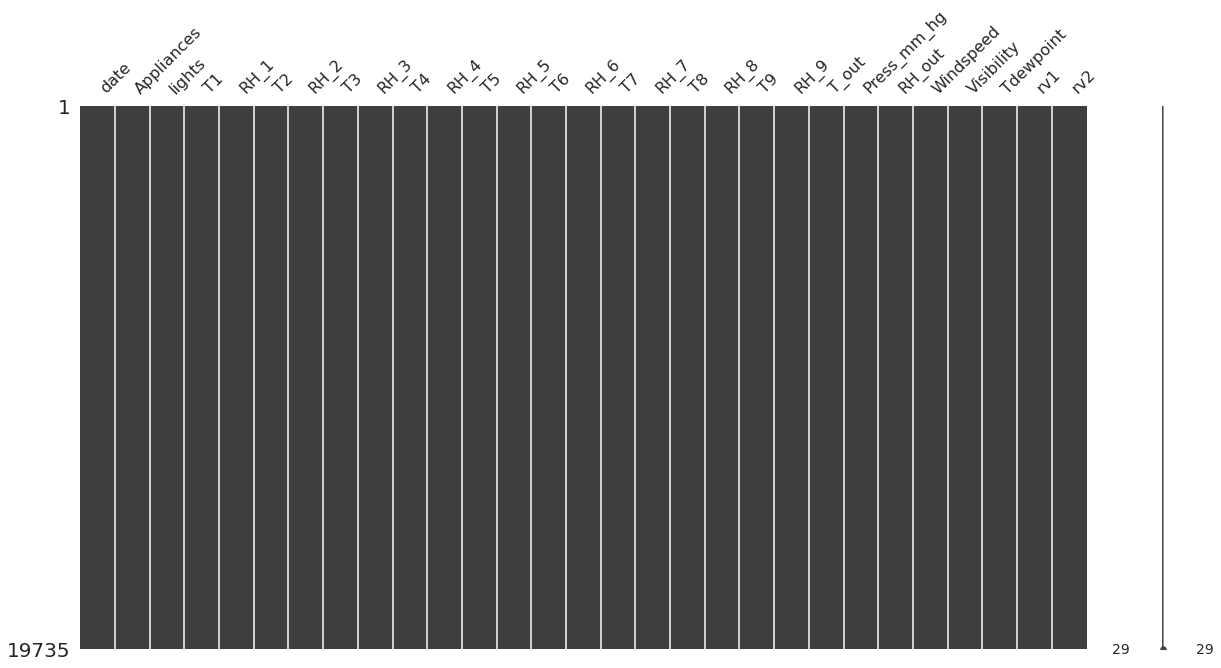

In [232]:
# missing value
mno.matrix(energyP_df, figsize = (20, 10))

## as we can see from above output there is no null value in this data set

In [233]:
# lets see is there any duplicate row in dataset
energyP_df.duplicated().any()

False

## there is no duplicate value in dataframe

In [234]:
# extracting year from date column
energyP_df['year']=pd.DatetimeIndex(energyP_df['date']).year

In [235]:
# lets see the count of years
energyP_df.groupby(['year'])['year'].count()

year
2016    19735
Name: year, dtype: int64

## as we can see here that this data is from one year
## so i don't think that we need year so i am drop year column from dataframe

In [236]:
# droping year column from dataset
energyP_df.drop('year',axis=1,inplace=True)

In [237]:
# extracting month from date column
energyP_df['month']=pd.DatetimeIndex(energyP_df['date']).month

In [238]:
# extracting day from date column
energyP_df['day']=pd.DatetimeIndex(energyP_df['date']).weekday

In [239]:
# converting date column into datatime data type
energyP_df['date'] = pd.to_datetime(energyP_df['date'])


In [240]:
energyP_df['day_name']=energyP_df['date'].dt.strftime('%A')

## so now we have successfully extracted the month and day from date column

In [241]:
#to get hour and minute
energyP_df['time']=energyP_df['date'].dt.strftime('%H')

##**So now we have successfully extractred month,day,time from date column so now we can drop date column**

In [242]:
# droping date column
energyP_df.drop('date',axis=1,inplace=True)

## renaming column name for better understanding

In [243]:
# creating dictionary of tempreture features
temp_dict = {
    'T1' : 'temp_kitchen', 'T2' : 'temp_living', 'T3' : 'temp_laundry', 
    'T4' : 'temp_office', 'T5' : 'temp_bath', 'T6' : 'temp_outside',
    'T7' : 'temp_iron', 'T8' : 'temp_teen', 'T9' : 'temp_parents', 'T_out' : 'temp_station'
}

In [244]:
# renaming tempreture features in dataset
energyP_df = energyP_df.rename(columns=temp_dict)

In [245]:
# creating dictionary of humidity features
humid_dict = {
    'RH_1' : 'humid_kitchen', 'RH_2' : 'humid_living', 'RH_3' : 'humid_laundry', 
    'RH_4' : 'humid_office', 'RH_5' : 'humid_bath', 'RH_6' : 'humid_outside',
    'RH_7' : 'humid_iron', 'RH_8' : 'humid_teen', 'RH_9' : 'humid_parents', 'RH_out' : 'humid_station'
}

In [246]:
# renaming humidity feature
energyP_df = energyP_df.rename(columns=humid_dict)

In [247]:
energyP_df.head()

,Appliances,lights,temp_kitchen,humid_kitchen,temp_living,humid_living,temp_laundry,humid_laundry,temp_office,humid_office,temp_bath,humid_bath,temp_outside,humid_outside,temp_iron,humid_iron,temp_teen,humid_teen,temp_parents,humid_parents,temp_station,Press_mm_hg,humid_station,Windspeed,Visibility,Tdewpoint,rv1,rv2,month,day,day_name,time
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,1,0,Monday,17
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,1,0,Monday,17
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,1,0,Monday,17
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,1,0,Monday,17
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,1,0,Monday,17


In [248]:
energyP_df.describe(include='all')

,Appliances,lights,temp_kitchen,humid_kitchen,temp_living,humid_living,temp_laundry,humid_laundry,temp_office,humid_office,temp_bath,humid_bath,temp_outside,humid_outside,temp_iron,humid_iron,temp_teen,humid_teen,temp_parents,humid_parents,temp_station,Press_mm_hg,humid_station,Windspeed,Visibility,Tdewpoint,rv1,rv2,month,day,day_name,time
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735,19735
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,24
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thursday,17
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2880,828
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033,3.101647,2.977249,NaN,NaN
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634,1.339200,1.985617,NaN,NaN
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322,1.000000,0.000000,NaN,NaN
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889,2.000000,1.000000,NaN,NaN
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653,3.000000,3.000000,NaN,NaN
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769,4.000000,5.000000,NaN,NaN


## **Visualisation**



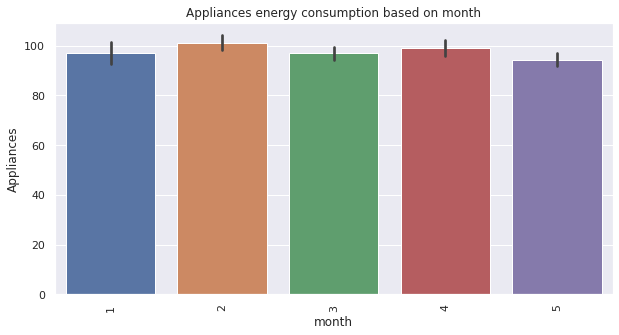

In [249]:
# Plotting the bar plot
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)

plt.title("Appliances energy consumption based on month")
sns.barplot(energyP_df.month, energyP_df.Appliances)
plt.show()

## From above graph we can see that the energy consumption for each month is approximately equal to

In [250]:

a_time=energyP_df.groupby('time')['Appliances'].sum().reset_index()


In [251]:
# line graph for energy consumption of appliances
fig = go.Figure(data=[go.Line(
            x=a_time.time, y= a_time.Appliances,
            text=a_time.time,
            
        )])
fig.update_xaxes(type='category')

fig.show()

## as we can see from above line graph that use of appliances energy consumption is more in day time as compare to night

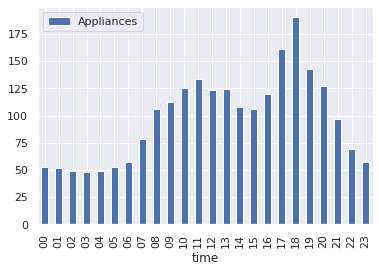

In [252]:
# average energy consumption of appliances
energyP_df.groupby('time').agg({'Appliances' : 'mean'}).plot.bar()

## from above bar plot we can see that the peak hour is 6PM.
## and we can see that from 10PM-6AM the energy consumption of appliances is very low which is around 50wh.

In [253]:
# creating dataframe of avg tempreture 
avg_temp=energyP_df.groupby('month').agg({temp:'mean' for i ,temp in enumerate(temp_dict.values())}).reset_index()


In [254]:
# plot for avg tempreture 
fig = make_subplots(print_grid=True)

fig.add_trace(go.Scatter(x=avg_temp['month'], y=avg_temp['temp_living'], name="temp_living"))
fig.add_trace(go.Scatter(x=avg_temp['month'], y=avg_temp['temp_laundry'], name="  temp_laundry"))
fig.add_trace(go.Scatter(x=avg_temp['month'], y=avg_temp['temp_office'], name="temp_office "))
fig.add_trace(go.Scatter(x=avg_temp['month'], y=avg_temp['temp_bath'], name="temp_bath "))
fig.add_trace(go.Scatter(x=avg_temp['month'], y=avg_temp['temp_kitchen'], name="temp_kitchen"))
fig.add_trace(go.Scatter(x=avg_temp['month'], y=avg_temp['temp_iron'], name="temp_iron "))

fig.add_trace(go.Scatter(x=avg_temp['month'], y=avg_temp['temp_teen'], name="temp_teen"))
fig.add_trace(go.Scatter(x=avg_temp['month'], y=avg_temp['temp_parents'], name="temp_parents"))
fig.add_trace(go.Scatter(x=avg_temp['month'], y=avg_temp['temp_station'], name="temp_station"))
fig.add_trace(go.Scatter(x=avg_temp['month'], y=avg_temp['temp_outside'], name="temp_outside"))

fig.update_layout(
    autosize=True,
    width=600,
    height=500,
    title_text="average tempreture every month",
    margin=dict(
        l=60,
        r=10,
        b=1,
        t=60,
        pad=4,
        
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

This is the format of your plot grid:
[ (1,1) x,y ]



## the variance of temperatures inside the building is low, since the temperature inside is controlled. Although the increase temperature seem to have no impact on the appliance consumtion patterns.we can also observe that significant increase of tempreture over the course of 5 months strating from 3-4 degree celcius in january to 14-15 degree celcius in month of may.
## outside tempreture and station tempreture is low in the month of january  because of winter and high tempreture in the month of may becuase of summer

In [255]:
# average humidity per month
avg_humid=energyP_df.groupby('month').agg({temp:'mean' for i ,temp in enumerate(humid_dict.values())}).reset_index()


In [256]:
# plot for avg humidity 
fig = make_subplots(print_grid=True)

fig.add_trace(go.Scatter(x=avg_humid['month'], y=avg_humid['humid_kitchen'], name="humid_kitchen"))
fig.add_trace(go.Scatter(x=avg_humid['month'], y=avg_humid['humid_living'], name="  humid_living"))
fig.add_trace(go.Scatter(x=avg_humid['month'], y=avg_humid['humid_laundry'], name="humid_laundry "))
fig.add_trace(go.Scatter(x=avg_humid['month'], y=avg_humid['humid_office'], name="humid_office "))
fig.add_trace(go.Scatter(x=avg_humid['month'], y=avg_humid['humid_bath'], name="humid_bath"))

fig.add_trace(go.Scatter(x=avg_humid['month'], y=avg_humid['humid_iron'], name="humid_iron"))
fig.add_trace(go.Scatter(x=avg_humid['month'], y=avg_humid['humid_teen'], name="humid_teen"))
fig.add_trace(go.Scatter(x=avg_humid['month'], y=avg_humid['humid_parents'], name="humid_parents"))
fig.add_trace(go.Scatter(x=avg_humid['month'], y=avg_humid['humid_station'], name="humid_station"))
fig.add_trace(go.Scatter(x=avg_humid['month'], y=avg_humid['humid_outside'], name="humid_outside "))


fig.update_layout(
    autosize=True,
    width=600,
    height=500,
    title_text="average humidity every month",
    margin=dict(
        l=60,
        r=10,
        b=1,
        t=60,
        pad=4,
        
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

This is the format of your plot grid:
[ (1,1) x,y ]



##we can see from above graph the humidity outside building tend to decrease over months, the humidity inside rooms seem to be unaffected. The humidity levels outside seem to be negatively correlated to with the temperature levels outside.

In [257]:
# average tempreture every day
avg_temp_day=energyP_df.groupby(['day_name','day']).agg({temp:'mean' for i ,temp in enumerate(temp_dict.values())}).reset_index().sort_values('day')

In [258]:
fig = make_subplots(print_grid=True)

fig.add_trace(go.Scatter(x=avg_temp_day['day_name'], y=avg_temp_day['temp_kitchen'], name="temp_kitchen"))
fig.add_trace(go.Scatter(x=avg_temp_day['day_name'], y=avg_temp_day['temp_living'], name="  temp_living"))
fig.add_trace(go.Scatter(x=avg_temp_day['day_name'], y=avg_temp_day['temp_laundry'], name="temp_laundry "))
fig.add_trace(go.Scatter(x=avg_temp_day['day_name'], y=avg_temp_day['temp_office'], name="temp_office "))
fig.add_trace(go.Scatter(x=avg_temp_day['day_name'], y=avg_temp_day['temp_bath'], name="temp_bath"))

fig.add_trace(go.Scatter(x=avg_humid_day['day_name'], y=avg_temp_day['temp_iron'], name="temp_iron"))
fig.add_trace(go.Scatter(x=avg_temp_day['day_name'], y=avg_temp_day['temp_teen'], name="temp_teen"))
fig.add_trace(go.Scatter(x=avg_temp_day['day_name'], y=avg_temp_day['temp_parents'], name="temp_parents"))
fig.add_trace(go.Scatter(x=avg_humid_day['day_name'], y=avg_temp_day['temp_station'], name="temp_station"))
fig.add_trace(go.Scatter(x=avg_temp_day['day_name'], y=avg_temp_day['temp_outside'], name="temp_outside "))


fig.update_layout(
    autosize=True,
    width=700,
    height=500,
    title_text="average tempreture every day",
    margin=dict(
        l=60,
        r=10,
        b=1,
        t=60,
        pad=4,
        
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

This is the format of your plot grid:
[ (1,1) x,y ]



## As we can see that tempreture of outside of the building is very low every as compare to inside building. The tempreture inside the building is constant every day 

In [259]:
avg_humid_day=energyP_df.groupby(['day_name','day']).agg({temp:'mean' for i ,temp in enumerate(humid_dict.values())}).reset_index().sort_values('day')


In [260]:
fig = make_subplots(print_grid=True)

fig.add_trace(go.Scatter(x=avg_humid_day['day_name'], y=avg_humid_day['humid_kitchen'], name="humid_kitchen"))
fig.add_trace(go.Scatter(x=avg_humid_day['day_name'], y=avg_humid_day['humid_living'], name="  humid_living"))
fig.add_trace(go.Scatter(x=avg_humid_day['day_name'], y=avg_humid_day['humid_laundry'], name="humid_laundry "))
fig.add_trace(go.Scatter(x=avg_humid_day['day_name'], y=avg_humid_day['humid_office'], name="humid_office "))
fig.add_trace(go.Scatter(x=avg_humid_day['day_name'], y=avg_humid_day['humid_bath'], name="humid_bath"))

fig.add_trace(go.Scatter(x=avg_humid_day['day_name'], y=avg_humid_day['humid_iron'], name="humid_iron"))
fig.add_trace(go.Scatter(x=avg_humid_day['day_name'], y=avg_humid_day['humid_teen'], name="humid_teen"))
fig.add_trace(go.Scatter(x=avg_humid_day['day_name'], y=avg_humid_day['humid_parents'], name="humid_parents"))
fig.add_trace(go.Scatter(x=avg_humid_day['day_name'], y=avg_humid_day['humid_station'], name="humid_station"))
fig.add_trace(go.Scatter(x=avg_humid_day['day_name'], y=avg_humid_day['humid_outside'], name="humid_outside "))


fig.update_layout(
    autosize=True,
    width=700,
    height=500,
    title_text="average humidity every day",
    margin=dict(
        l=60,
        r=10,
        b=1,
        t=60,
        pad=4,
        
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

This is the format of your plot grid:
[ (1,1) x,y ]



## From above plot as we can see that station's humidity is high every day as compared to the rest of the places. And humidity of iron is very low

##**Handlig Outliers**

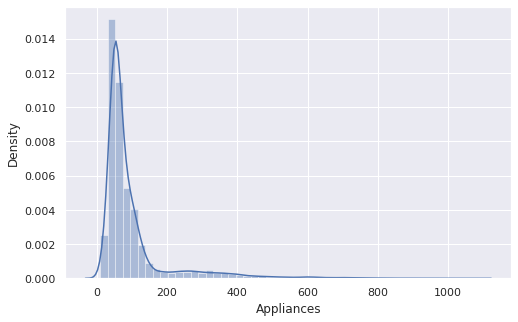

In [261]:
# lets see the distribution of Appliances column
sns.set(rc={'figure.figsize':(8,5)});
sns.distplot(energyP_df.Appliances);

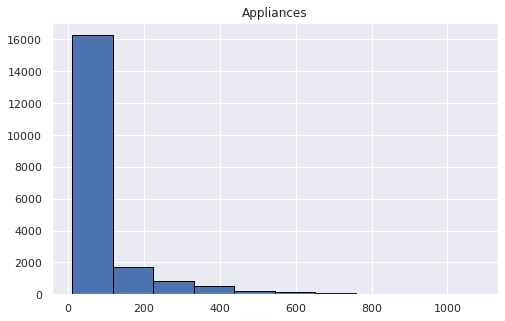

In [262]:
energyP_df.hist(column='Appliances',edgecolor='black');

## we can see from above graph that this distribution is right skewed 

## so i am using log transformation

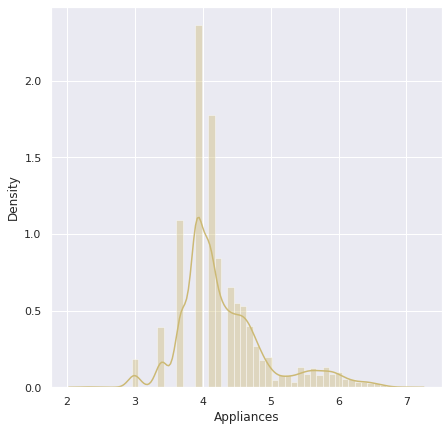

In [263]:
# log transformation
plt.figure(figsize=(7,7))
sns.distplot(np.log(energyP_df['Appliances']),color="y")

In [264]:
# Q-Q plot
def plot_data(df,feature):
  plt.figure(figsize=(10,6))
  plt.subplot(1,2,1)
  df[feature].hist()
  plt.subplot(1,2,2)
  stat.probplot(df[feature],dist='norm',plot=pylab)
  plt.show()

In [265]:
energyP_df['Appliances_log']=np.log(energyP_df['Appliances'])

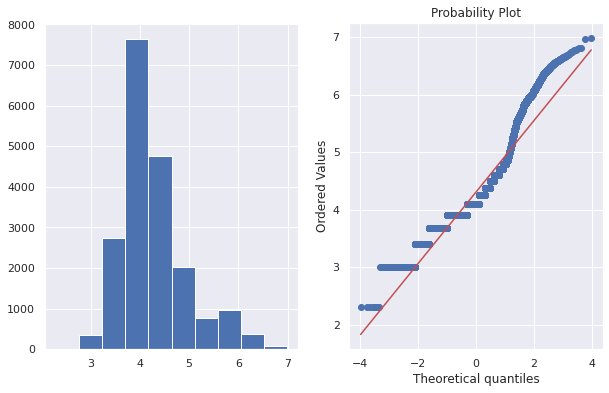

In [266]:
plot_data(energyP_df,'Appliances_log')

In [267]:
# square root transformation
energyP_df['Appliances_sqrt']=energyP_df['Appliances']**(1/2)

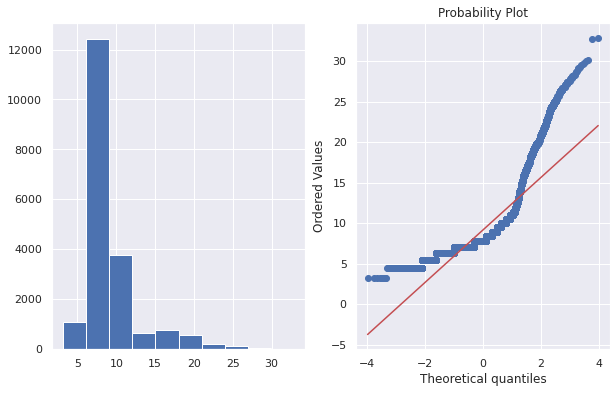

In [268]:
plot_data(energyP_df,'Appliances_sqrt')

In [269]:
energyP_df.drop('Appliances_sqrt',axis=1,inplace=True)

In [270]:
# exponential transformation
energyP_df['Appliances_expo']=energyP_df['Appliances']*(1/1.2)

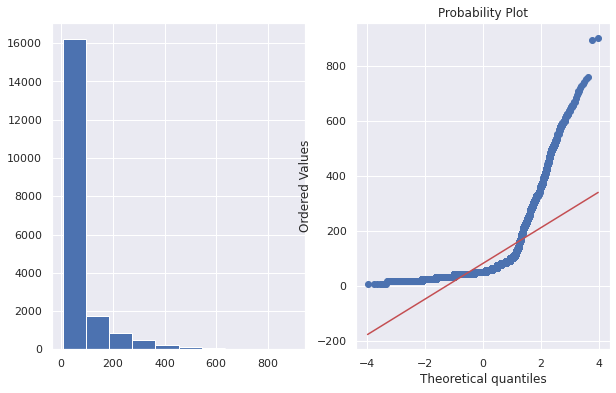

In [271]:
plot_data(energyP_df,'Appliances_expo')

In [272]:
energyP_df.drop('Appliances_expo',axis=1,inplace=True)

In [273]:
energyP_df['Appliances_boxcox'],parameter=stat.boxcox(energyP_df['Appliances'])

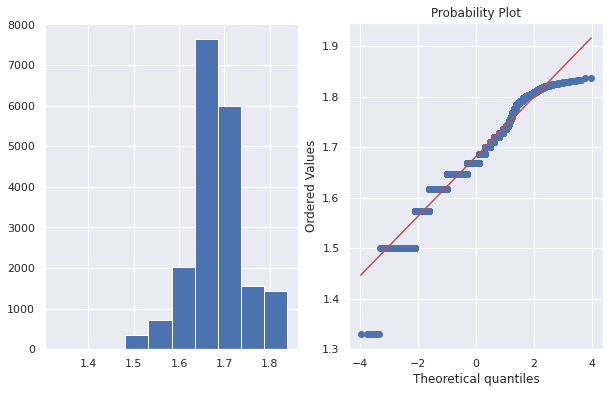

In [274]:
plot_data(energyP_df,'Appliances_boxcox')

In [275]:
energyP_df.drop('Appliances_boxcox',axis=1,inplace=True)

## after trying multiple transformation i have decided that to stick with log transformation

In [276]:
# Droping Appliances column
energyP_df.drop('Appliances',axis=1,inplace=True)

In [277]:
energyP_df.head()

,lights,temp_kitchen,humid_kitchen,temp_living,humid_living,temp_laundry,humid_laundry,temp_office,humid_office,temp_bath,humid_bath,temp_outside,humid_outside,temp_iron,humid_iron,temp_teen,humid_teen,temp_parents,humid_parents,temp_station,Press_mm_hg,humid_station,Windspeed,Visibility,Tdewpoint,rv1,rv2,month,day,day_name,time,Appliances_log
0,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,1,0,Monday,17,4.094345
1,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,1,0,Monday,17,4.094345
2,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,1,0,Monday,17,3.912023
3,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,1,0,Monday,17,3.912023
4,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,1,0,Monday,17,4.094345


In [278]:
# selecting numeric features from data set
numeric_features = energyP_df.describe().columns

## Distribution of all features

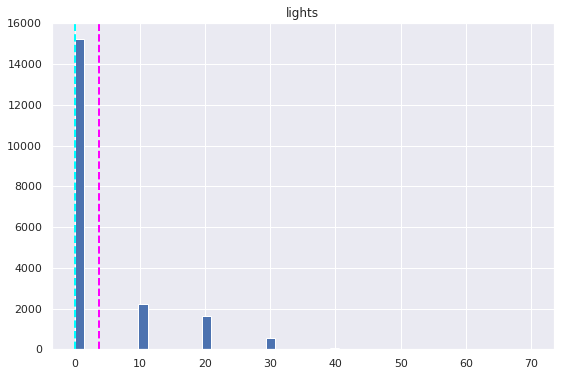

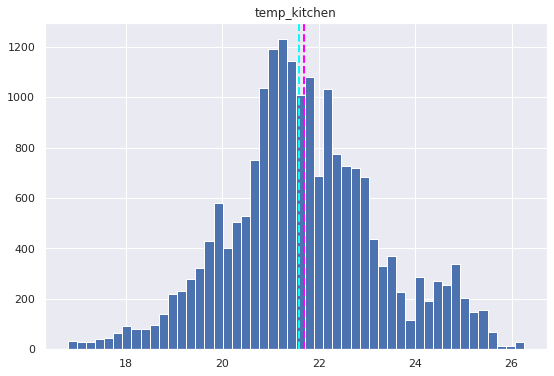

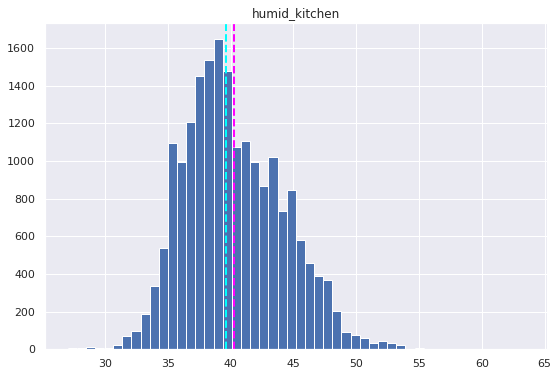

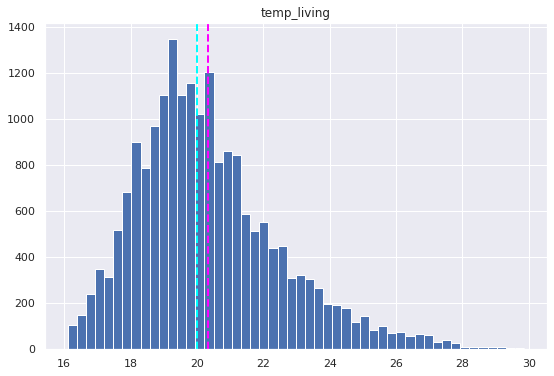

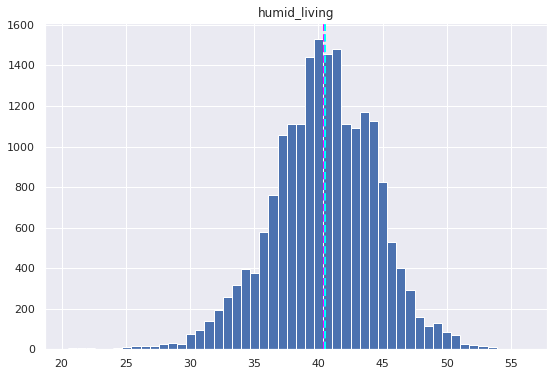

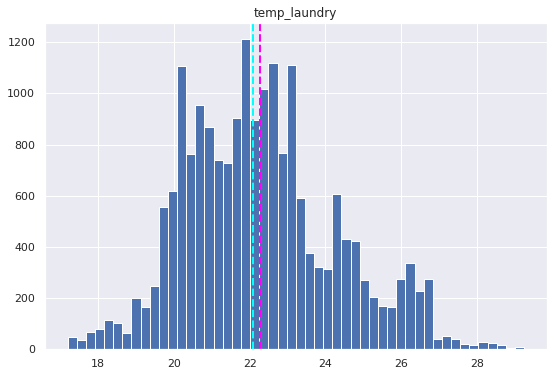

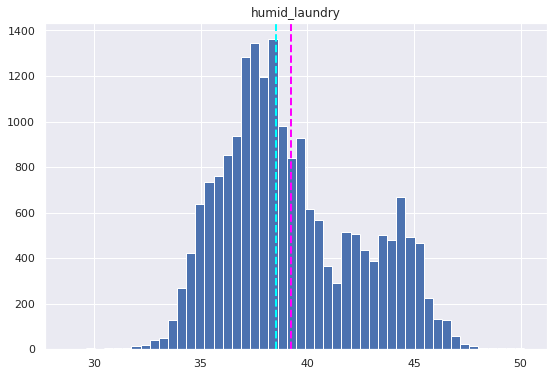

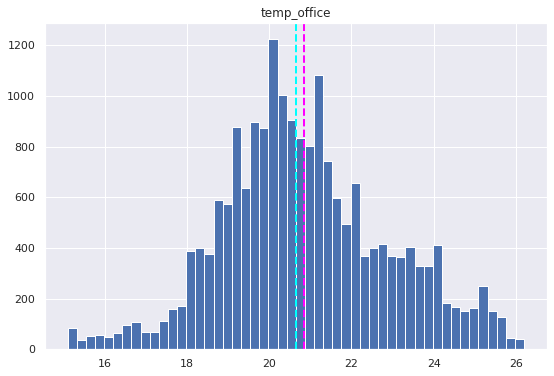

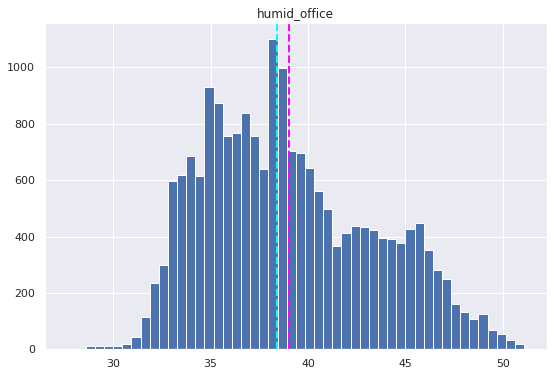

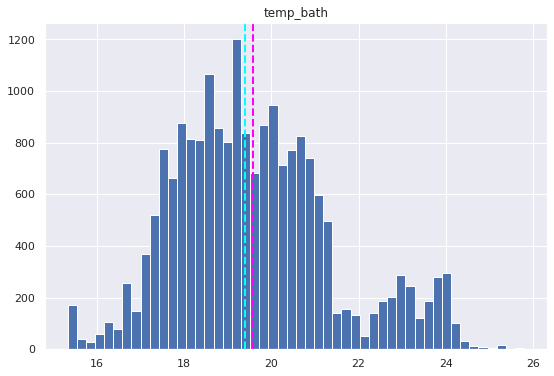

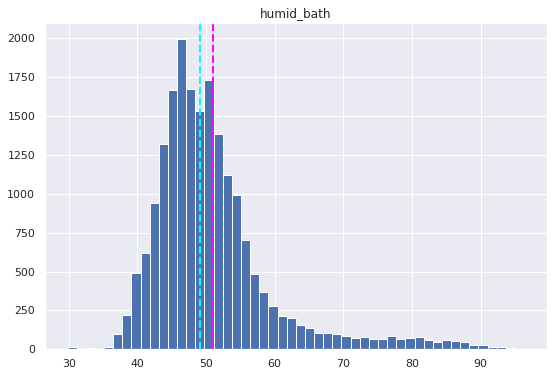

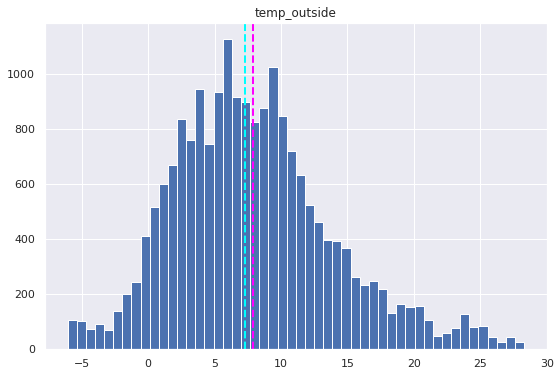

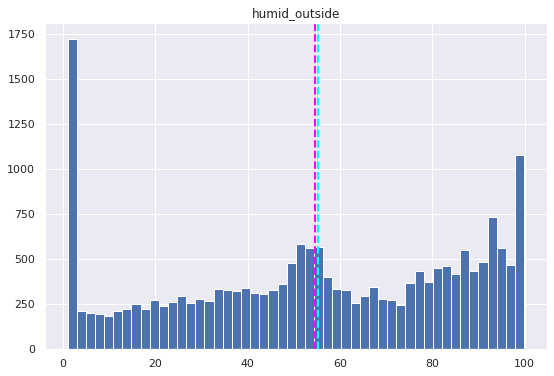

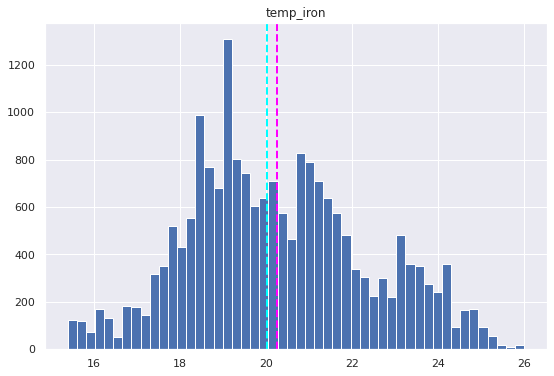

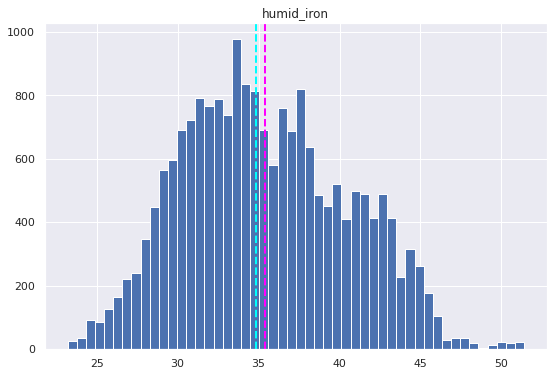

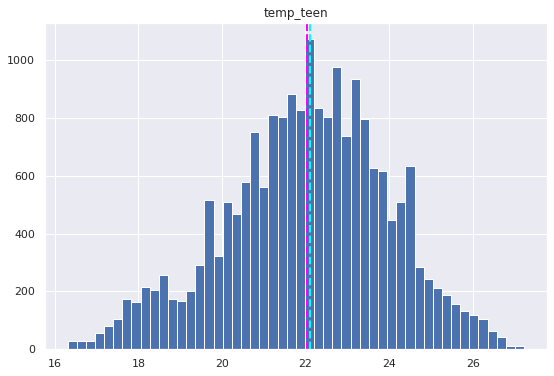

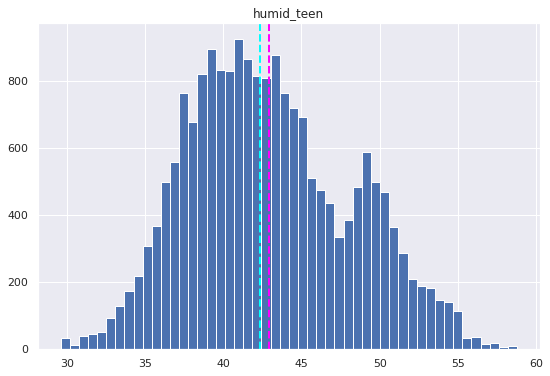

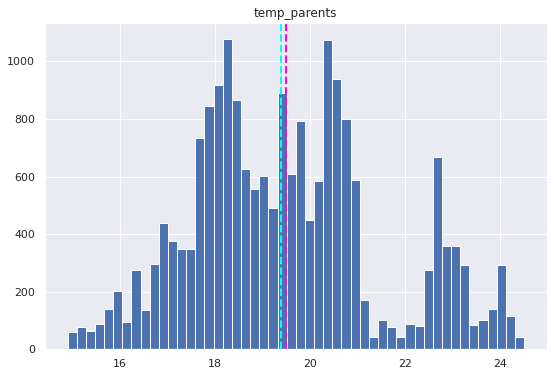

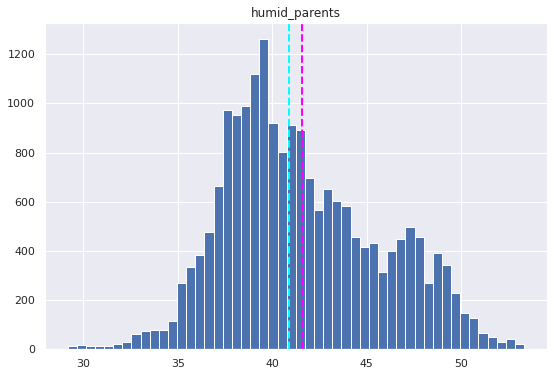

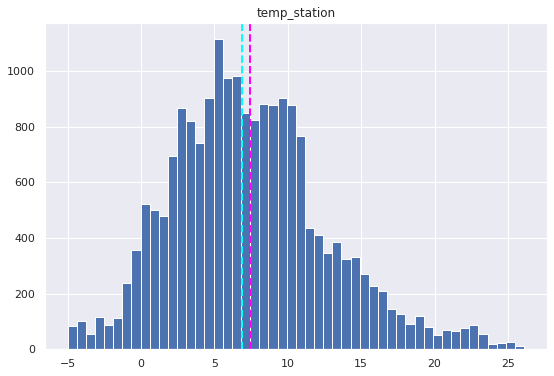

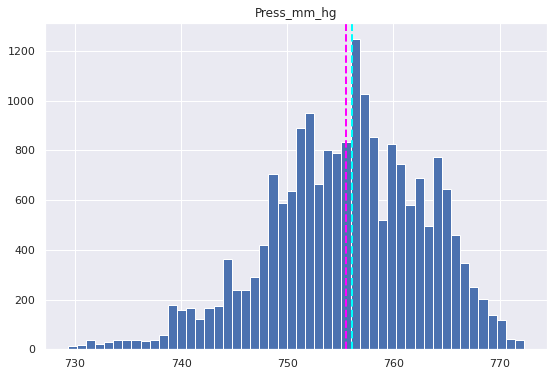

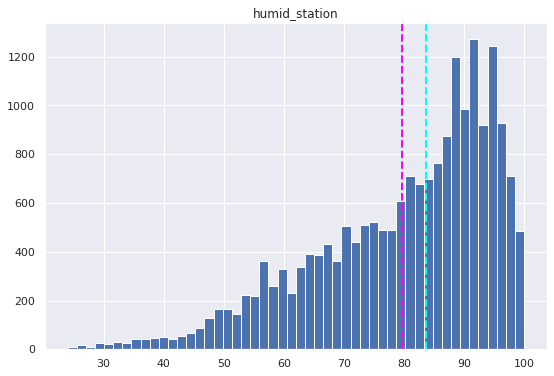

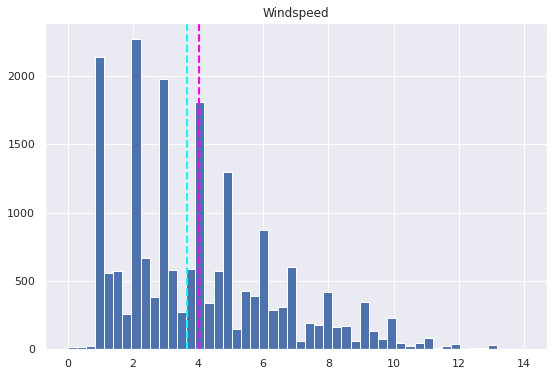

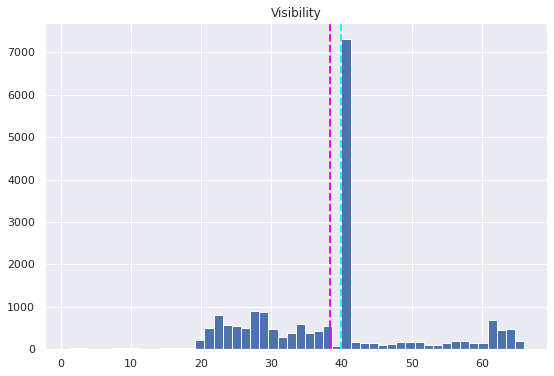

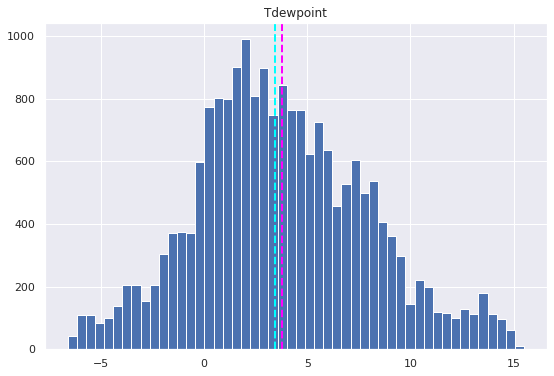

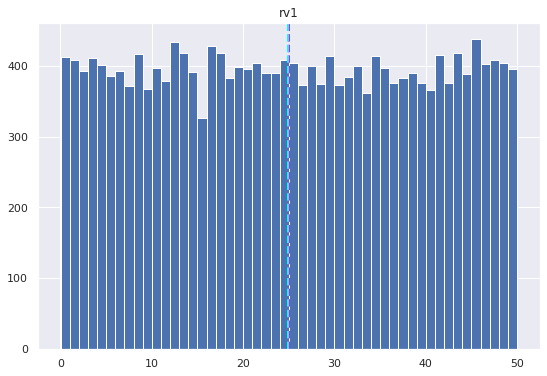

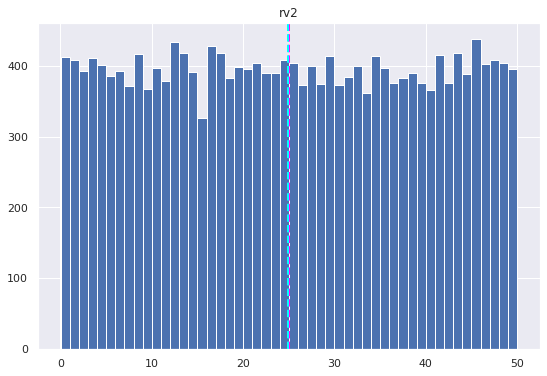

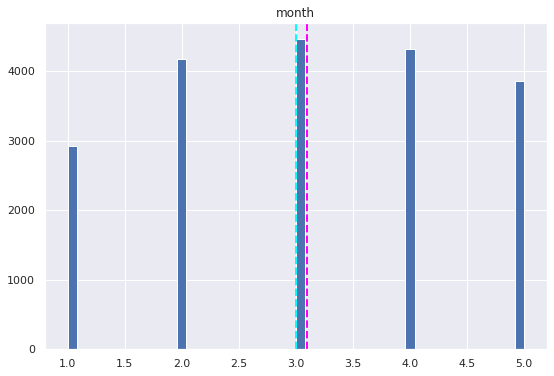

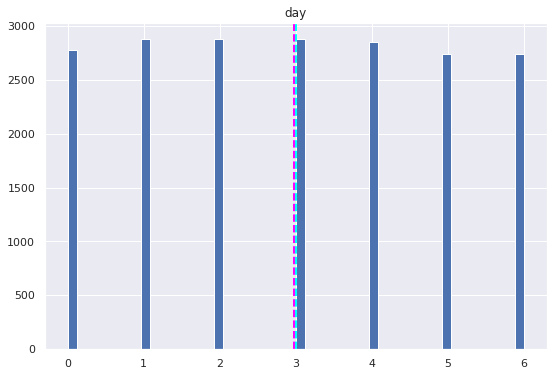

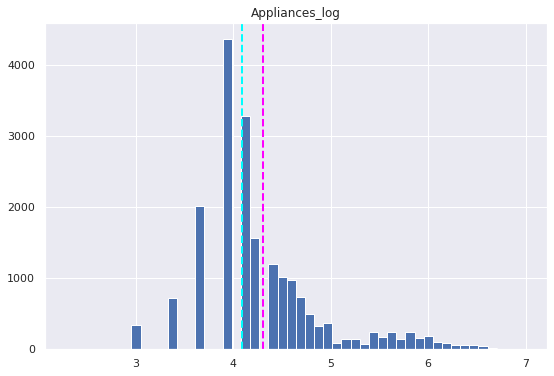

In [279]:
# lets distribution of all columns
for col in numeric_features[0:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = energyP_df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

# after observing above graphs we can say that many features are not normally distributed

In [280]:
energyP_df.lights.value_counts()

0     15252
10     2212
20     1624
30      559
40       77
50        9
60        1
70        1
Name: lights, dtype: int64

In [281]:
# Due to lot of zero enteries this column is of not much use and will be ignored in rest of the model
energyP_df.drop('lights',axis=1,inplace=True)

## Droping lights column due to lot of zero enteries this column is of not much use and will be ignored in rest of the model


In [282]:
# selecting numeric features from data set
numeric_features = energyP_df.describe().columns


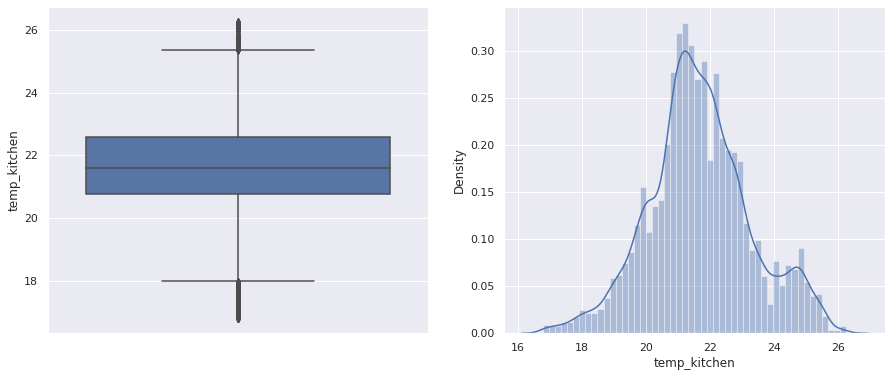

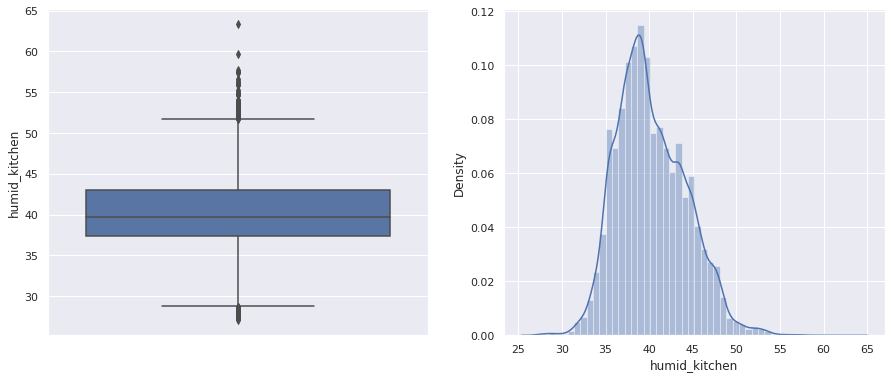

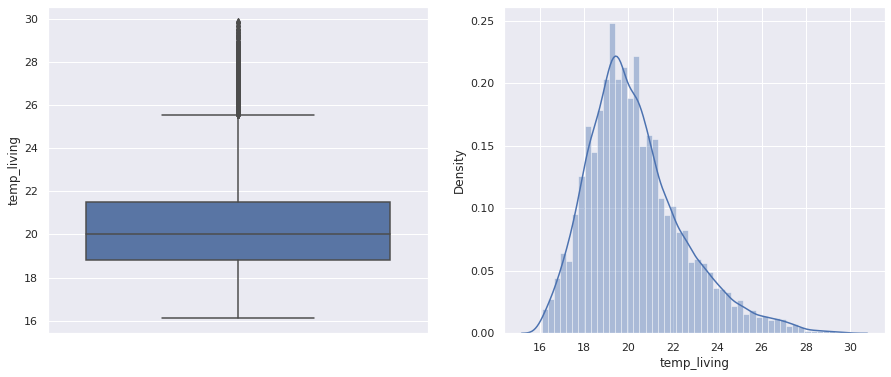

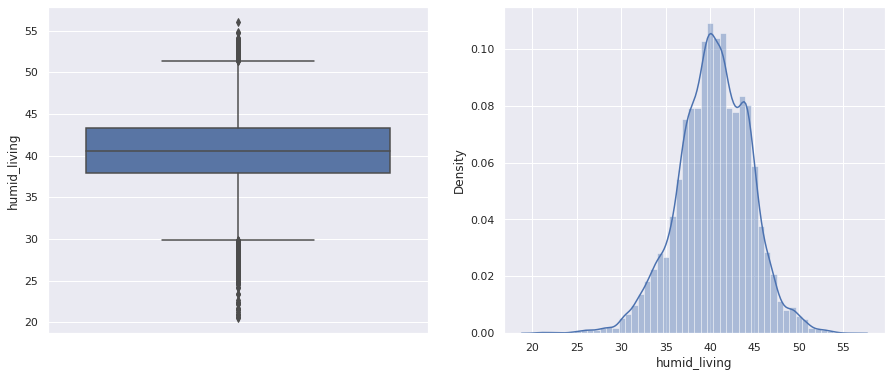

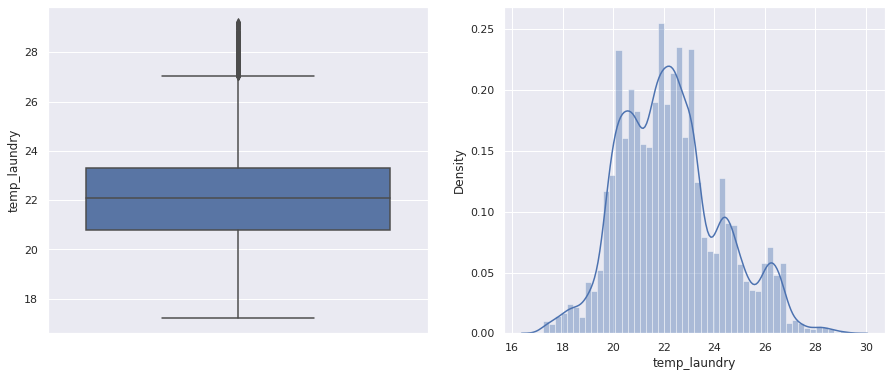

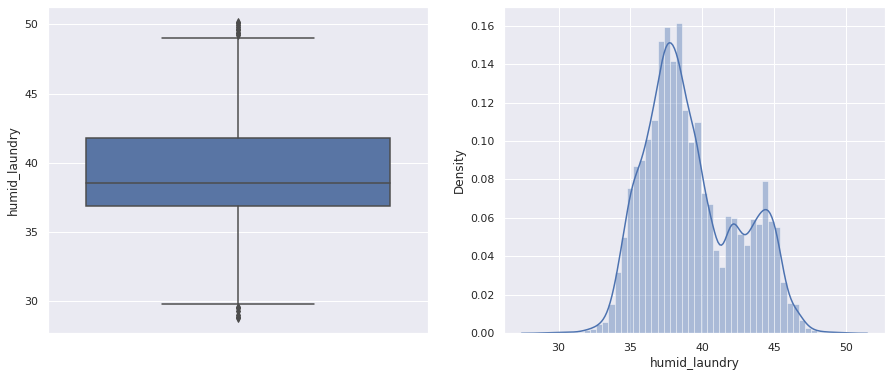

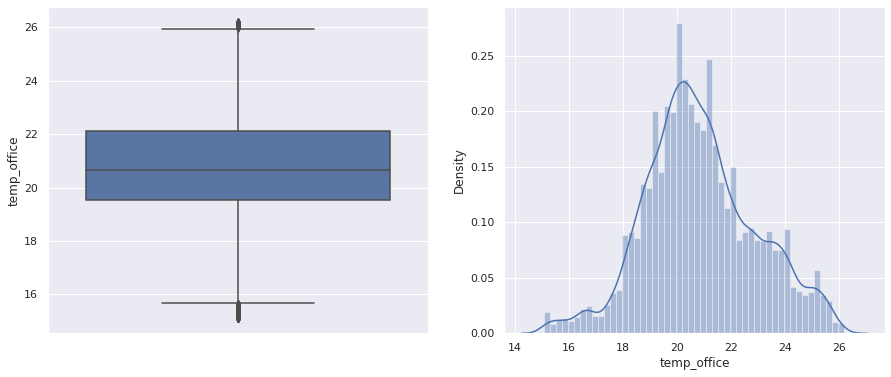

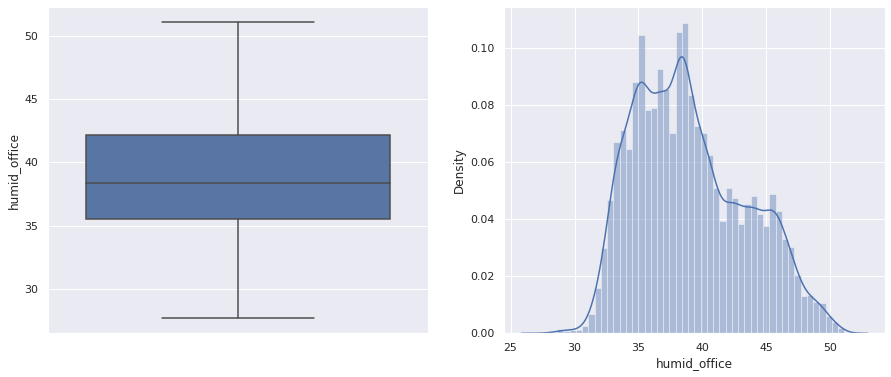

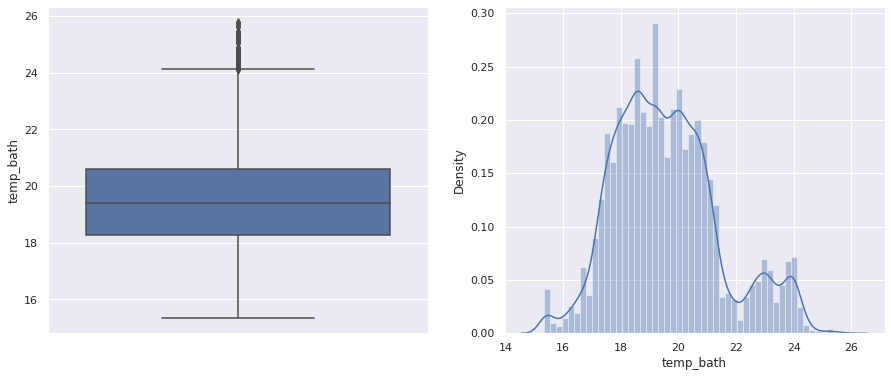

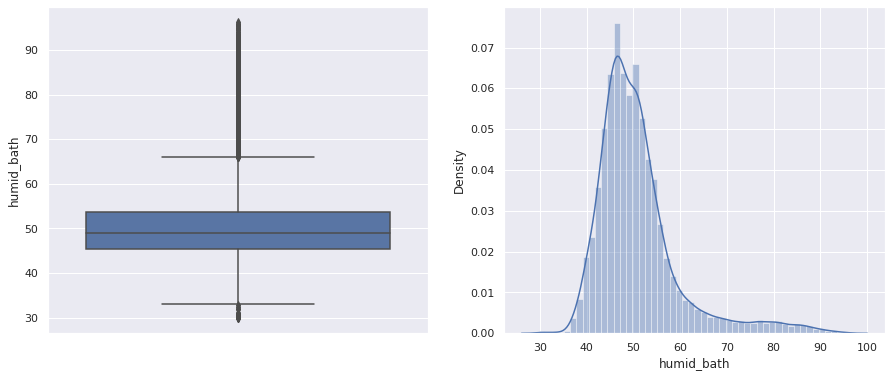

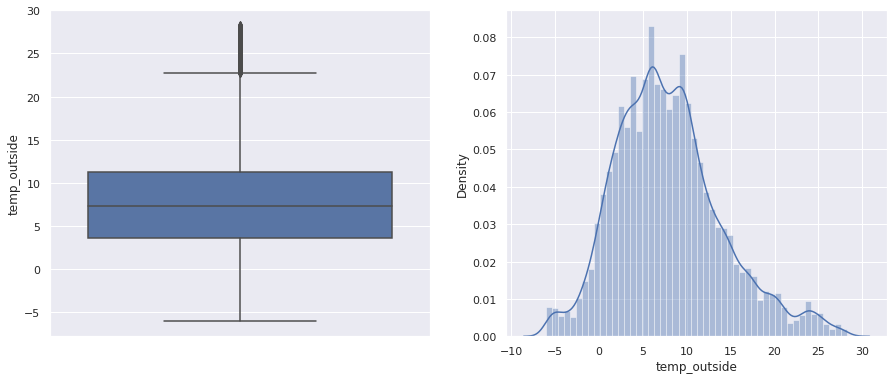

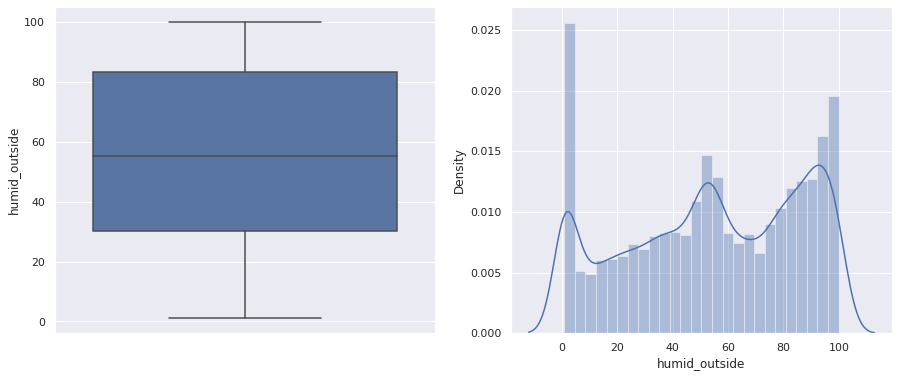

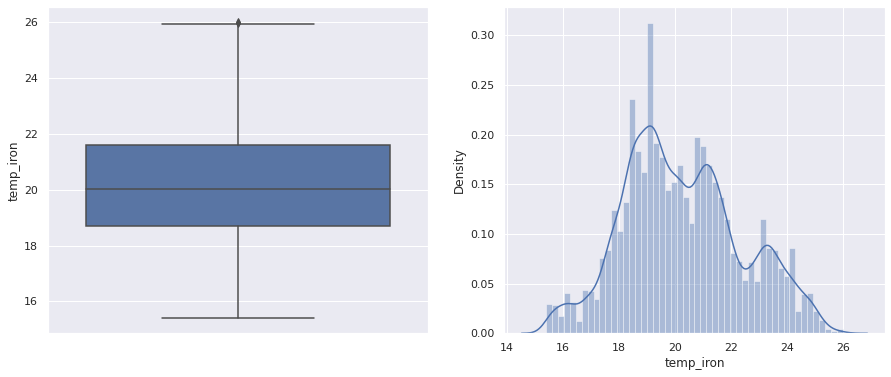

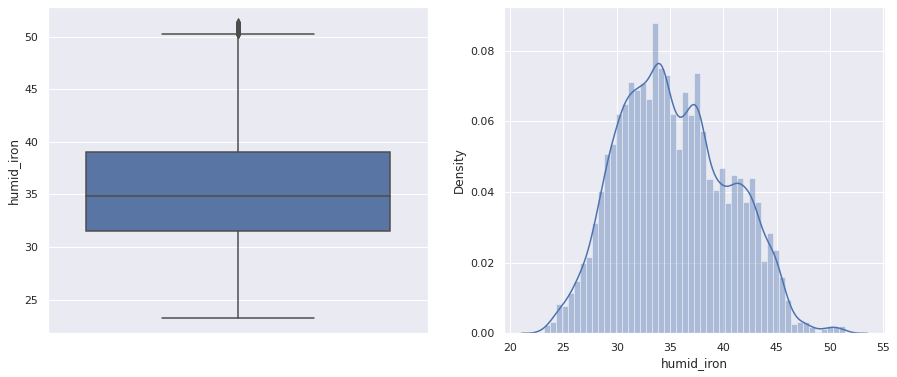

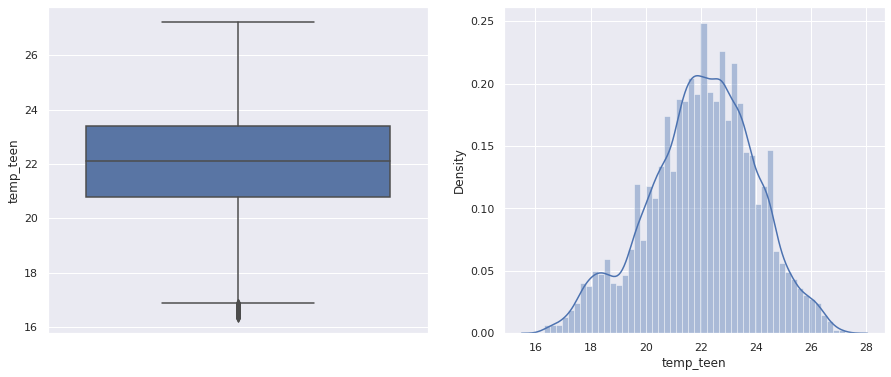

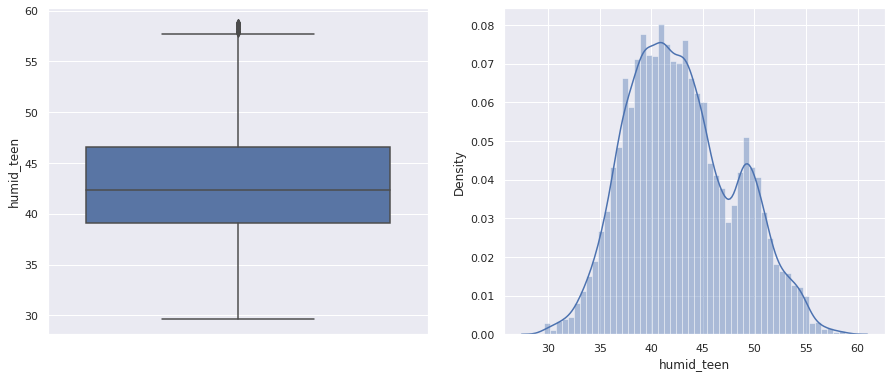

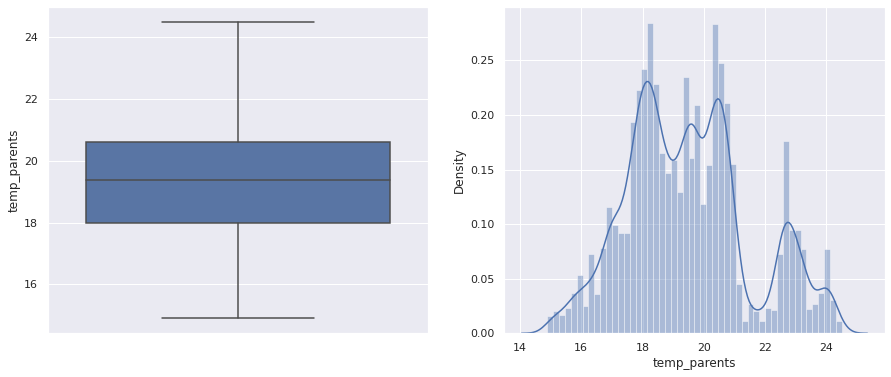

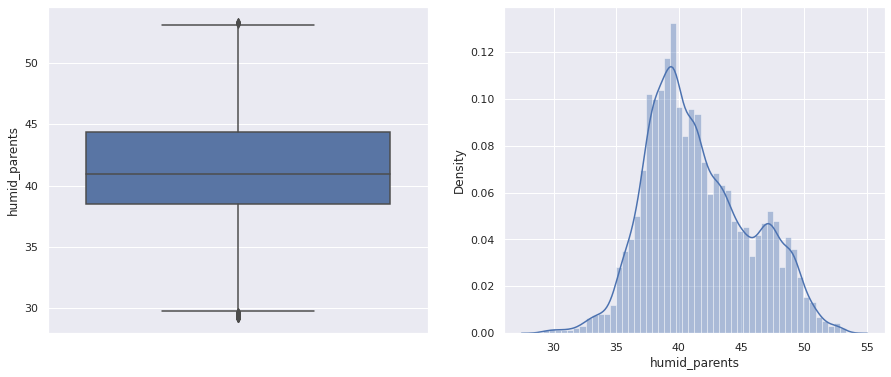

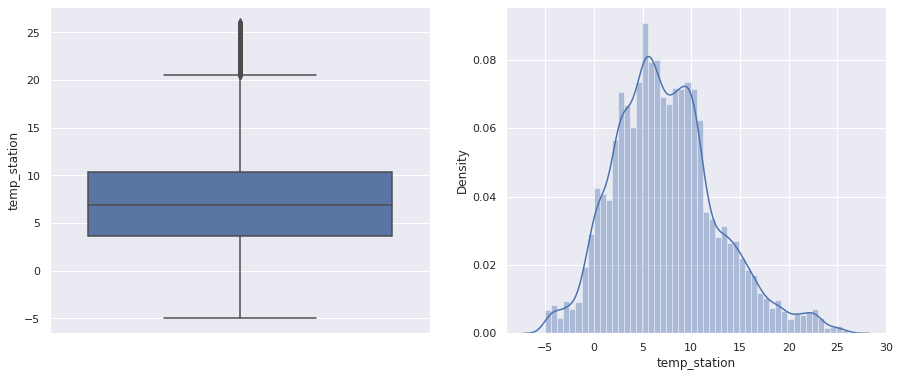

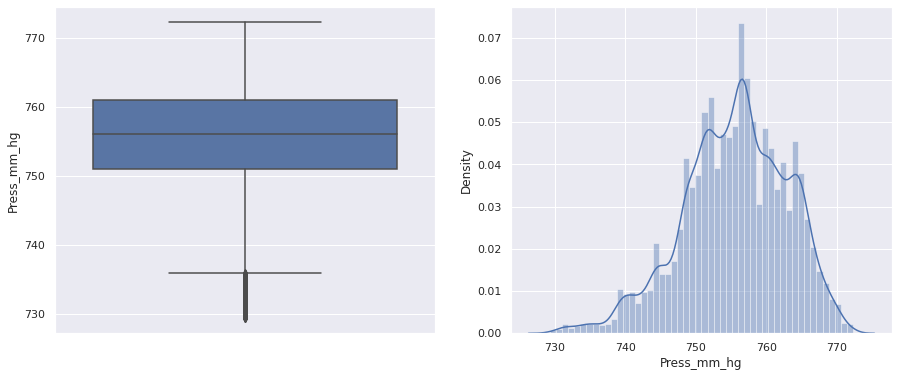

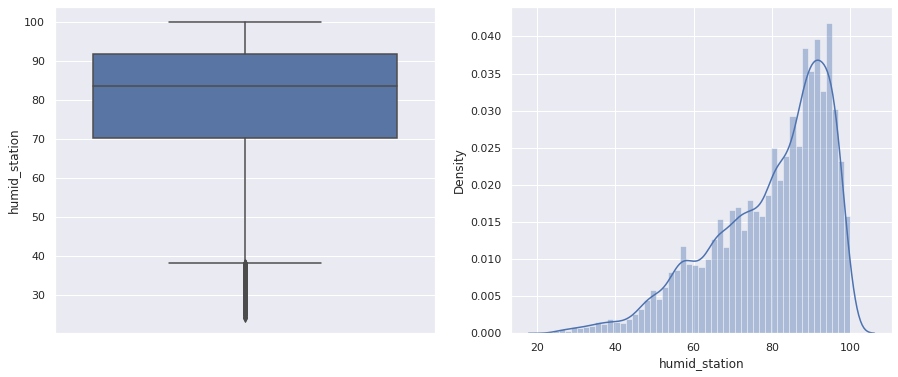

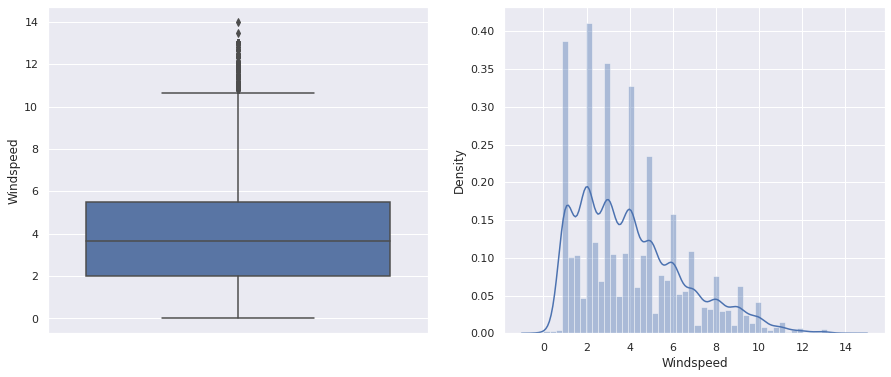

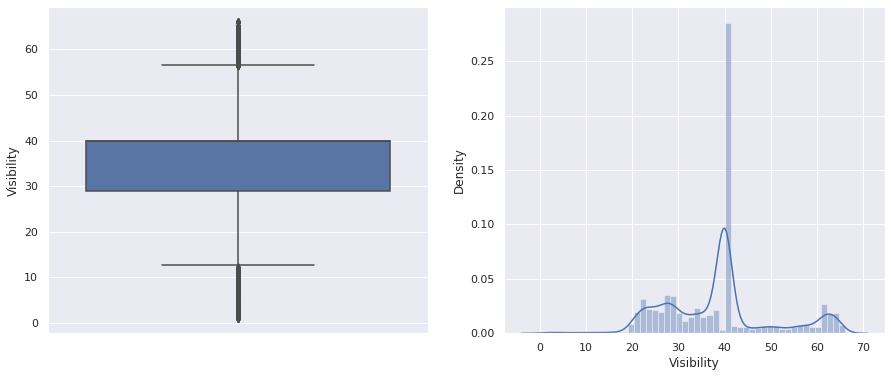

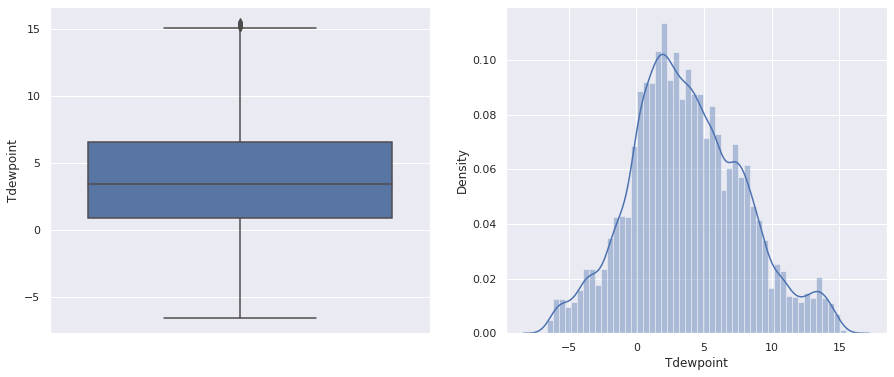

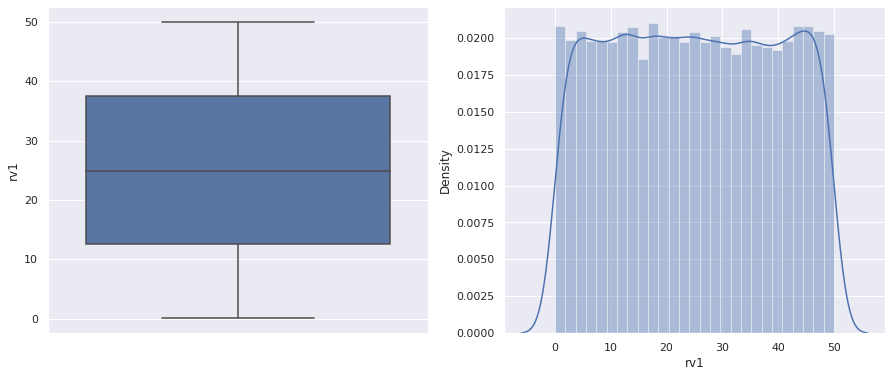

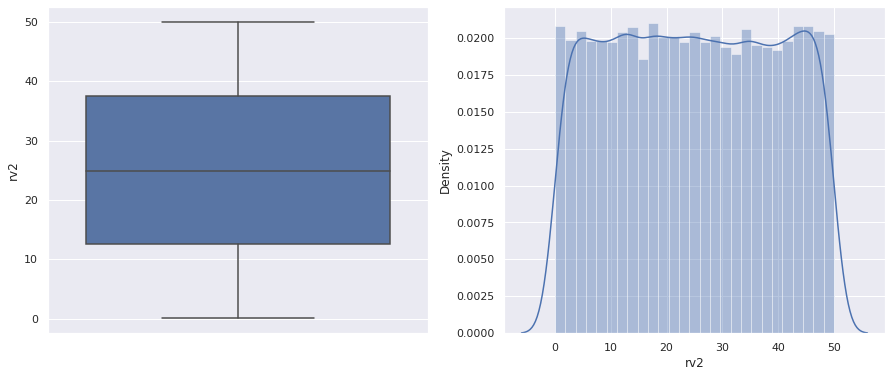

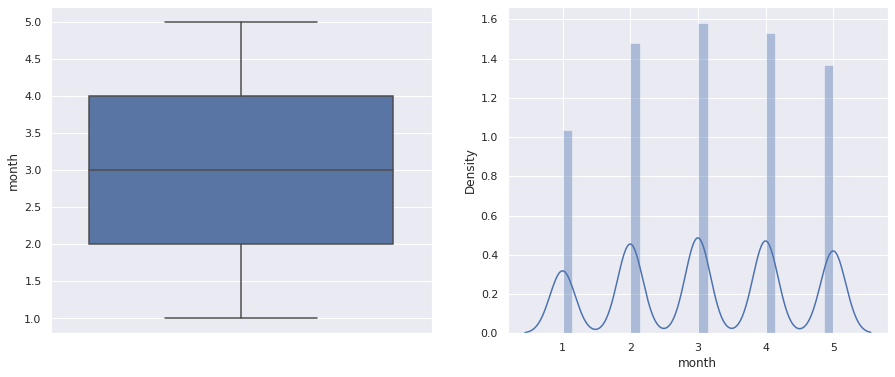

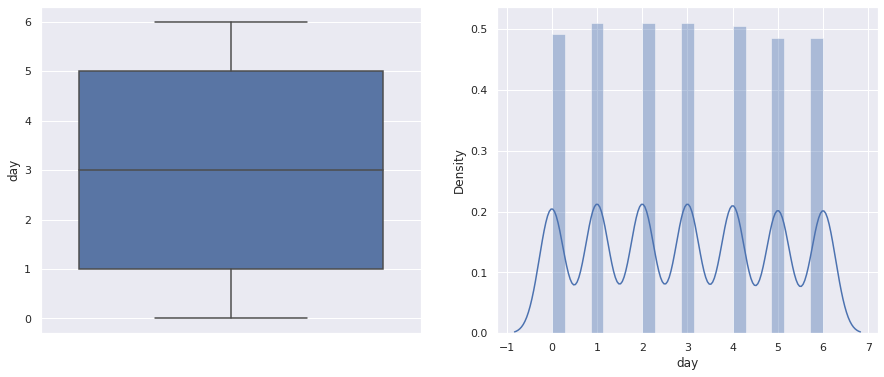

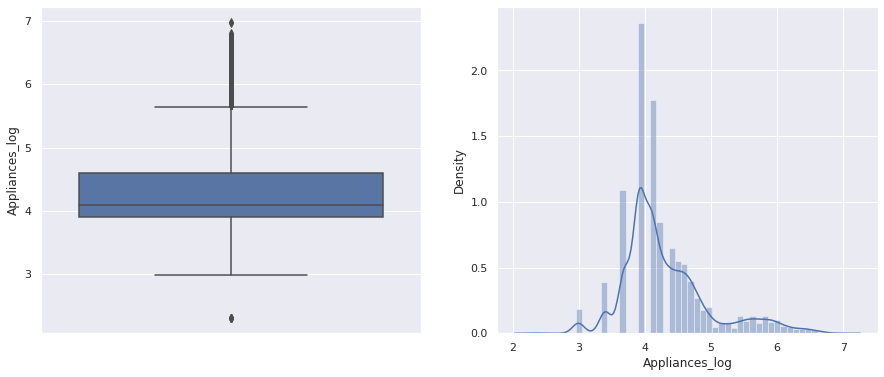

In [283]:
for var in numeric_features:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=energyP_df[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(energyP_df[var].dropna())
    fig.set_xlabel(var)

    plt.show()

##**Observations based on distribution plot**
1. All humidity values except humid_outside and humid_station follow a Normal distribution, i.e., all the readings from sensors inside the home are from a Normal distribution.
2. Similarly, all temperature readings follow a Normal distribution except for temp_parents.
3. Out of the remaining columns, we can see that Visibility, Windspeed and Appliances are skewed.
4. The random variables rv1 and rv2 have more or less the same values for all the recordings.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7db8583290>,
      dtype=object)

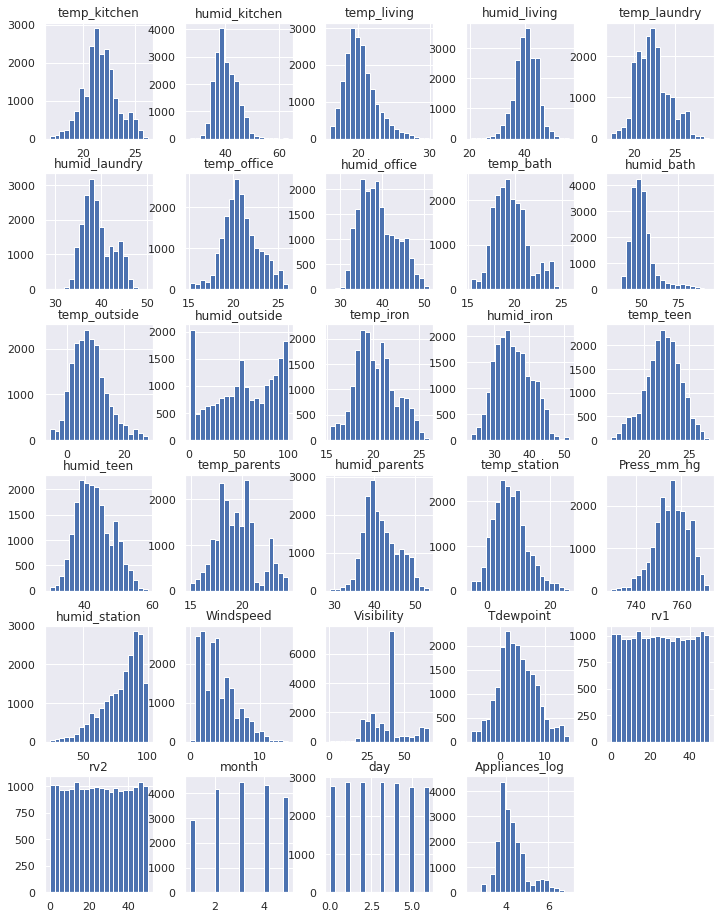

In [284]:
# Histogram of all the features to understand the distribution
energyP_df.hist(bins = 20 , figsize= (12,16))

In [285]:
label=energyP_df['Appliances_log']

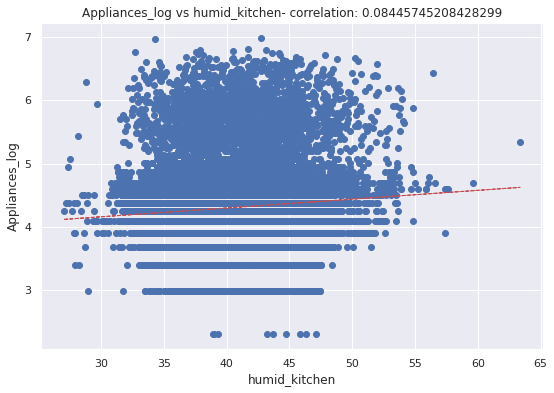

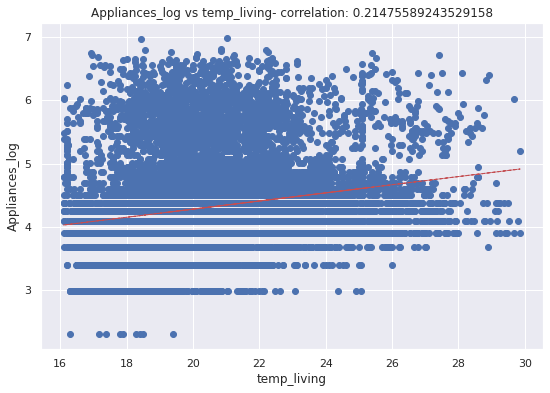

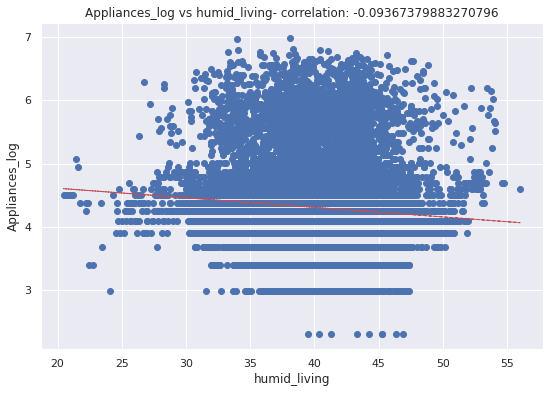

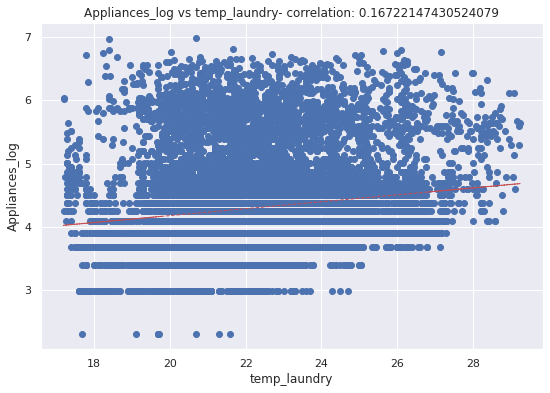

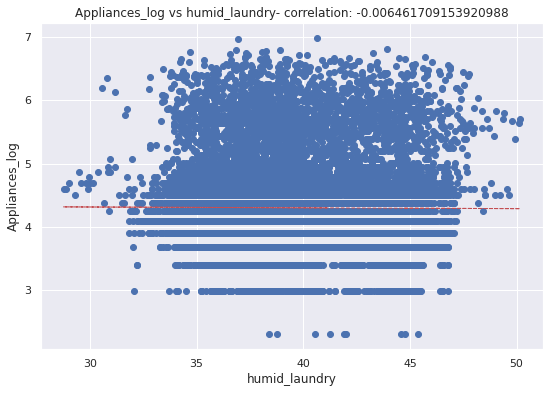

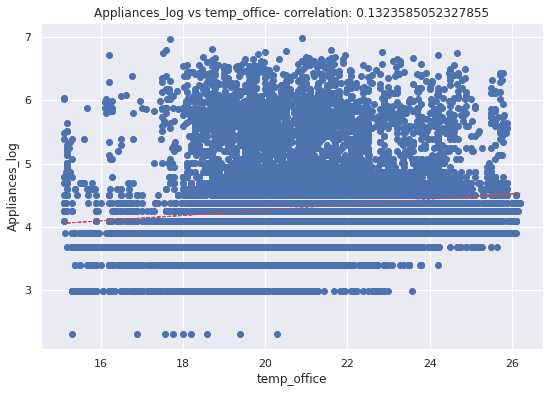

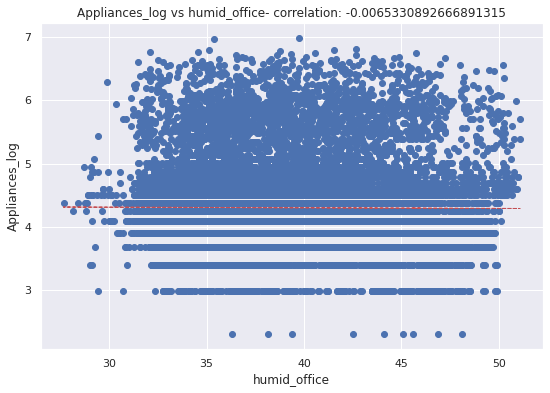

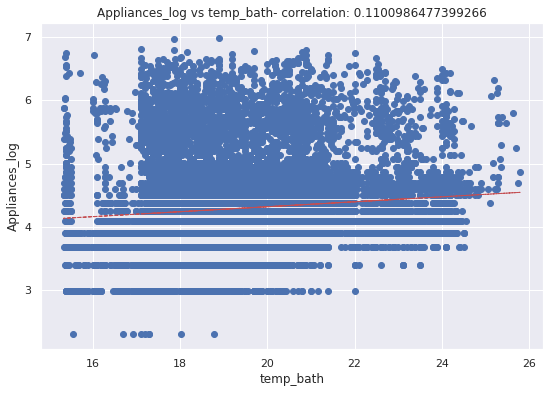

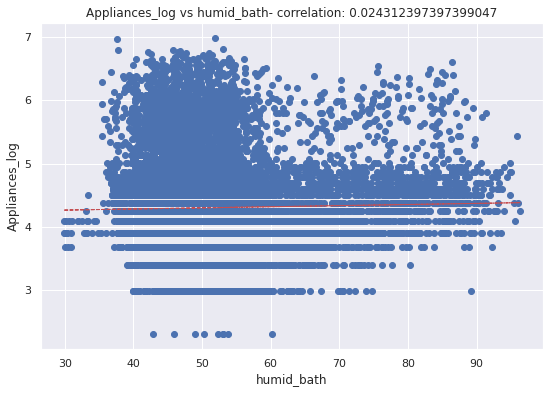

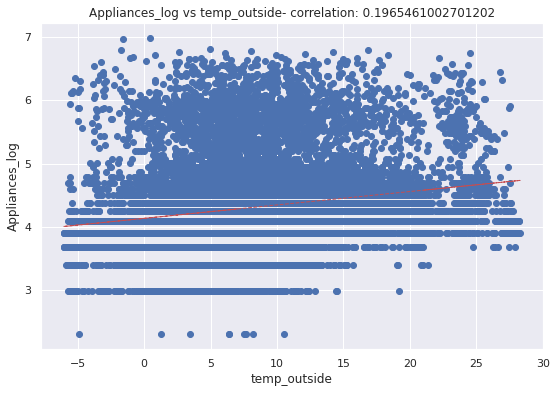

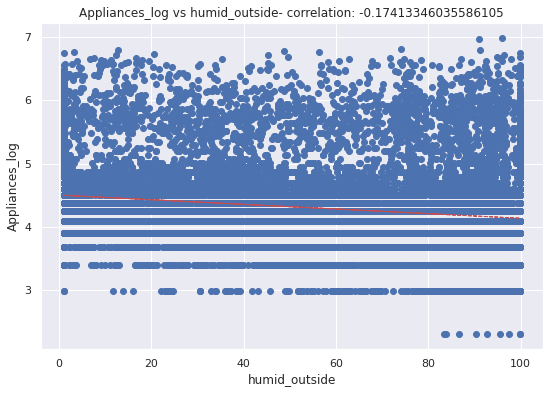

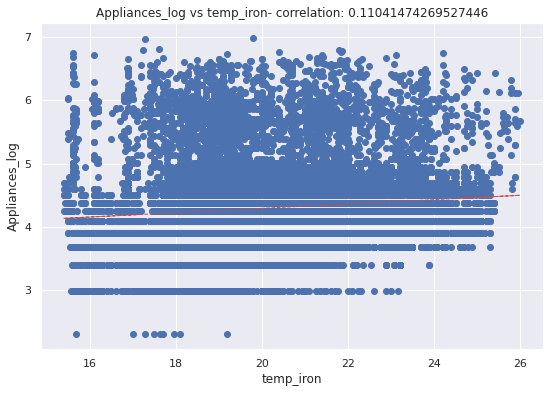

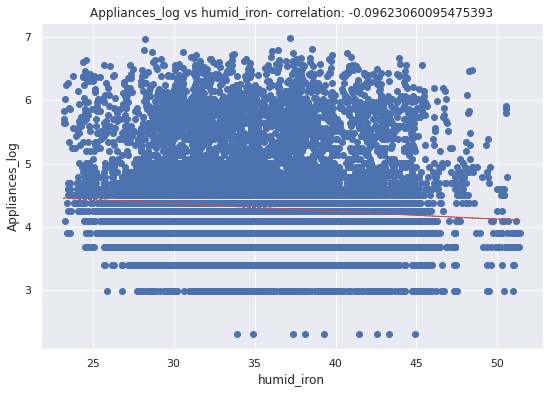

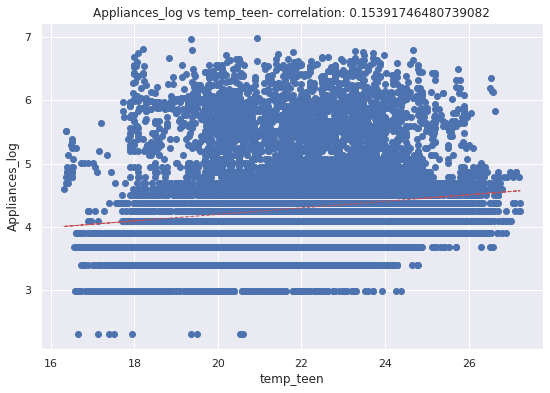

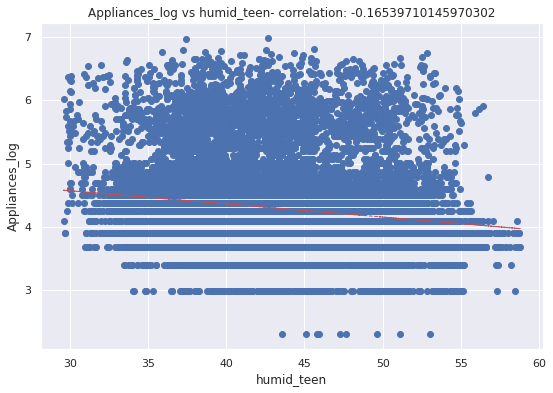

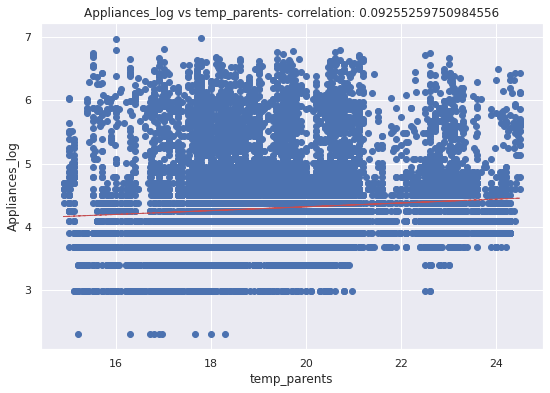

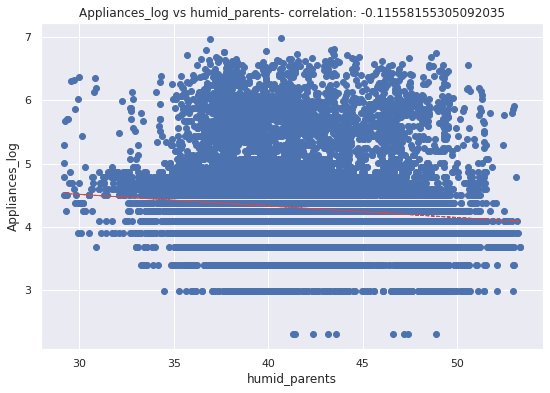

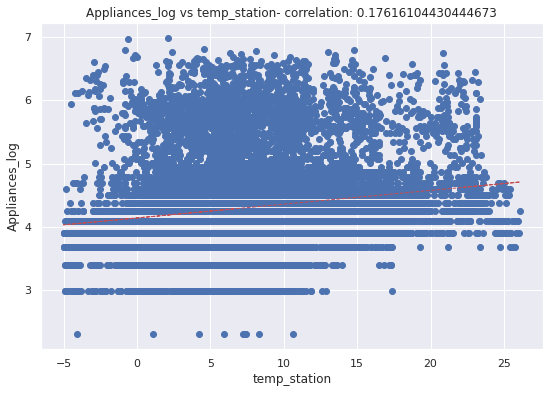

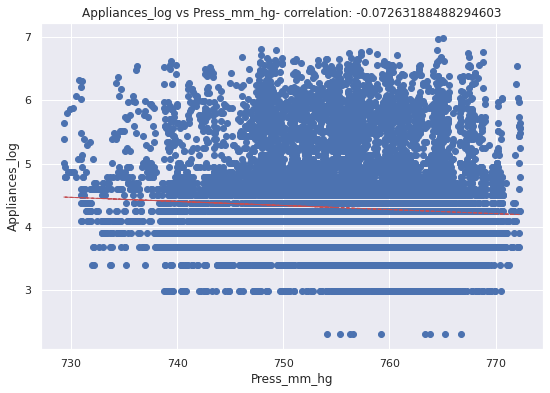

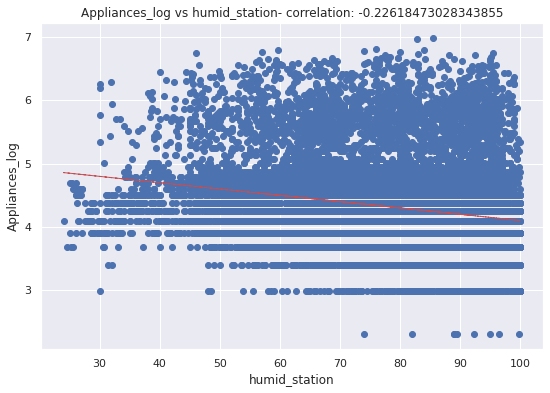

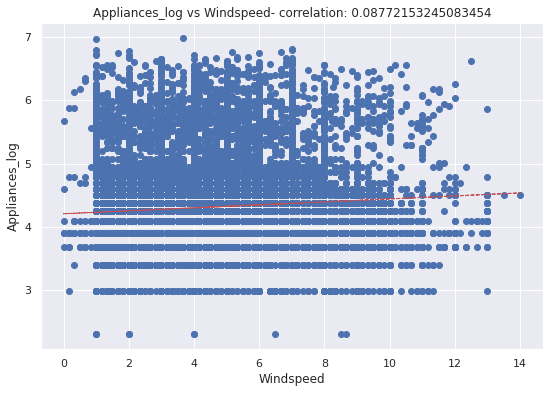

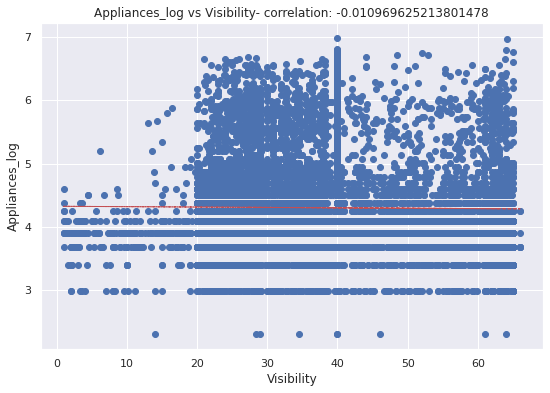

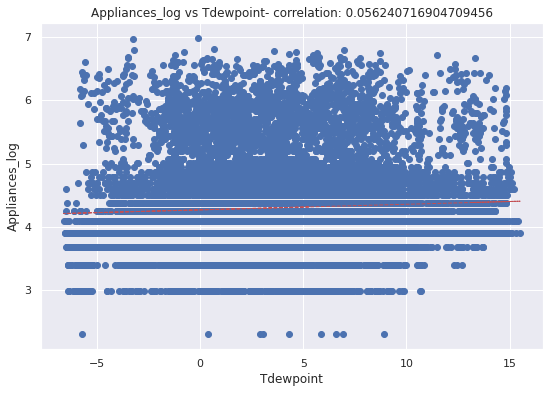

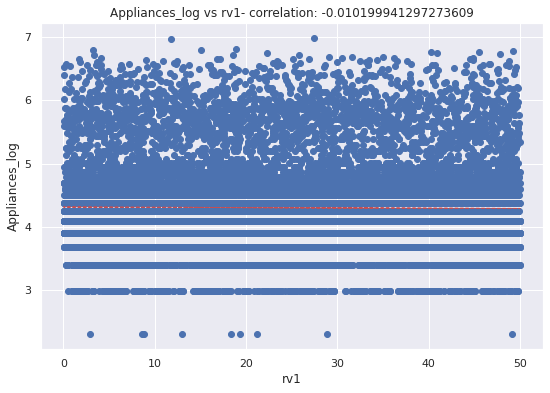

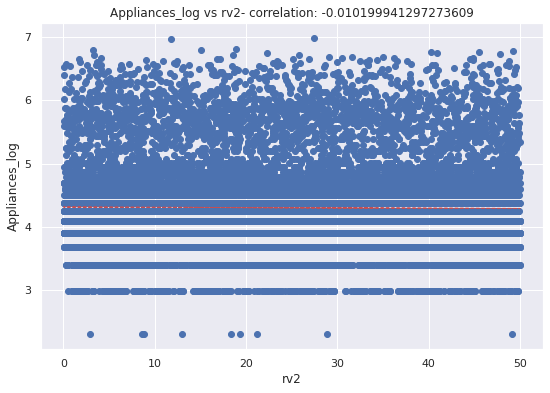

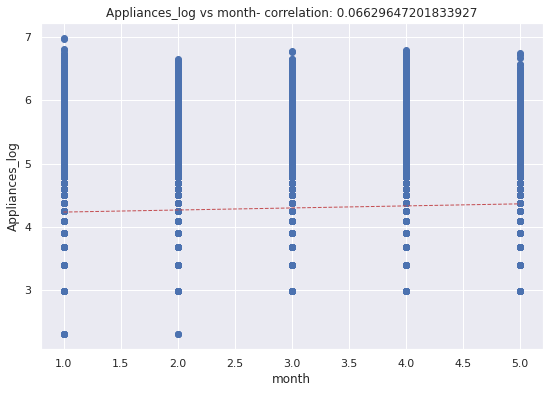

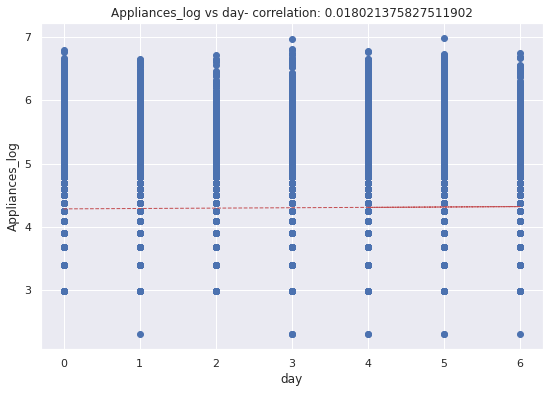

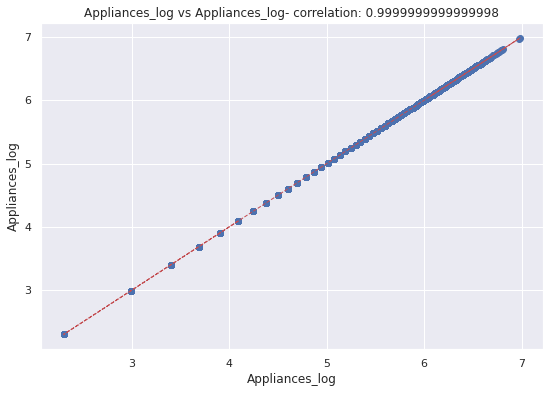

In [286]:
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = energyP_df[col]
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Appliances_log')
    ax.set_title('Appliances_log vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(energyP_df[col], energyP_df['Appliances_log'], 1)
    y_hat = np.poly1d(z)(energyP_df[col])

    plt.plot(energyP_df[col], y_hat, "r--", lw=1)

plt.show()

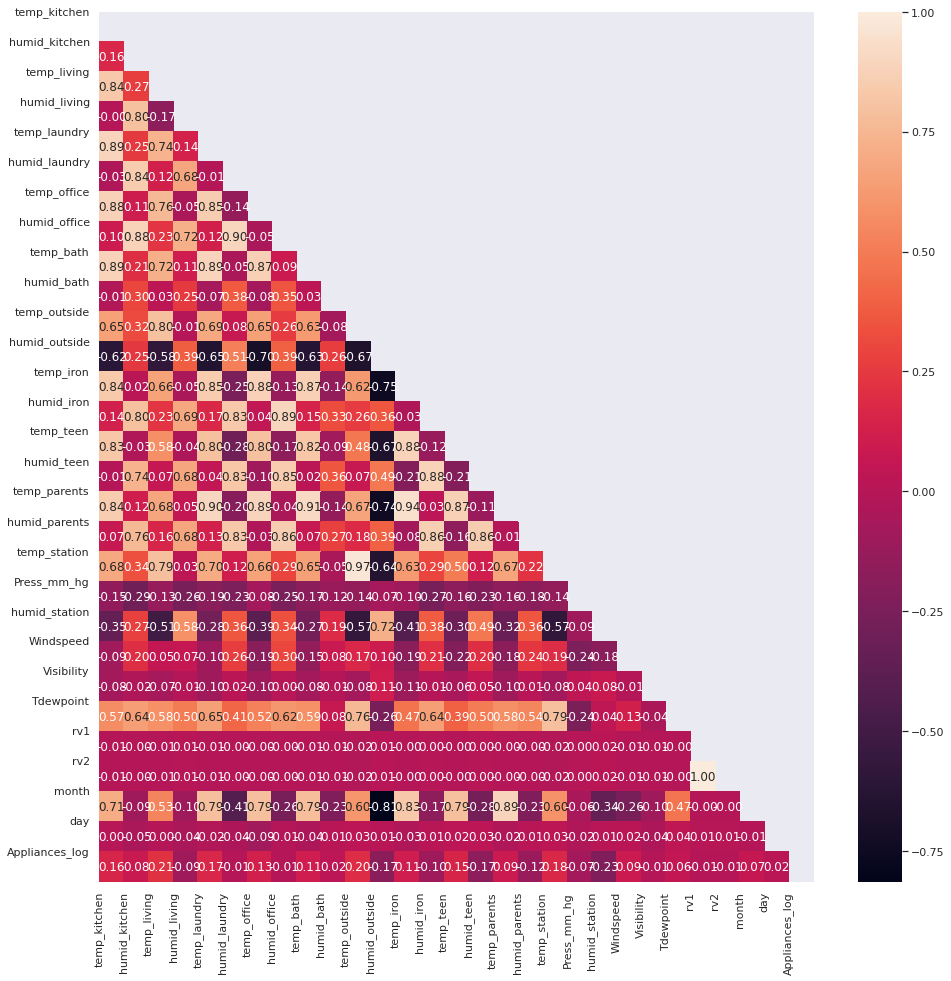

In [287]:
corr = energyP_df.corr()
# Mask the repeated values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
  
f, ax = plt.subplots(figsize=(16, 16))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, annot=True, fmt=".2f" , mask=mask,)
    #Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
plt.show()